In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

Read Data

In [2]:
mnist = pd.read_csv("../datasets/mnist_784.csv",dtype="int16")

In [3]:
mnist.shape

(70000, 785)

Build train and test set

In [4]:
X = pd.DataFrame(mnist.iloc[:,:-1])
y = pd.DataFrame(mnist.iloc[:,-1:])

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X))

X_train, y_train = X_scaled.iloc[:1000], y.iloc[:1000]
X_test, y_test = X_scaled.iloc[60000:], y.iloc[60000:]

In [5]:
X_test.shape

(10000, 784)

Learn number 6

In [6]:
y_train_6 = y_train["class"]==6
y_test_6 = y_test["class"]==6

# Start testing models

**Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = (DecisionTreeClassifier(random_state=0), "DecisionTree")

param_grid = parameters = {"max_depth":[10, 20, 30, 40]}

clf = GridSearchCV(model[0], param_grid=param_grid, cv=5)

clf.fit(X_train, y_train_6)

In [ ]:
print(clf.best_params_)
plt.plot(clf.cv_results_["mean_test_score"])

In [ ]:
plt.plot(clf.cv_results_["mean_test_score"])

In [ ]:
from sklearn.metrics import f1_score

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

f1_scr_train = f1_score(y_train_6, y_pred_train)
f1_scr_test = f1_score(y_test_6, y_pred_test)

print("Train: ", f1_scr_train)
print("Test: ", f1_scr_test)

**Random Forest**

{'max_features': 100, 'n_estimators': 5}


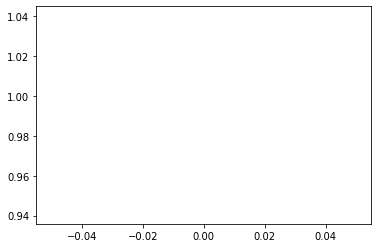

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = (RandomForestClassifier(random_state=0), "RandomForest")

param_grid = {"n_estimators":[5], "max_features":[100]}

clf = GridSearchCV(model[0], param_grid=param_grid, cv=3)

clf.fit(X_train, y_train_6)

print(clf.best_params_)
plt.plot(clf.cv_results_["mean_test_score"])

In [6]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

f1_scr_train = f1_score(y_train_6, y_pred_train)
f1_scr_test = f1_score(y_test_6, y_pred_test)

print("Train: ", f1_scr_train)
print("Test: ", f1_scr_test)

precision_train = precision_score(y_train_6, y_pred_train)
precision_test = precision_score(y_test_6, y_pred_test)
recall_train = recall_score(y_train_6, y_pred_train)
recall_test = recall_score(y_test_6, y_pred_test)

print("\n## Precision ##")
print("Train: ", precision_train)
print("Test: ", precision_test)
print("\n## Recall ##")
print("Train: ", recall_train)
print("Test: ", recall_test)

Train:  0.9953449005501482
Test:  0.9550977284733227

## Precision ##
Train:  0.9971171782262167
Test:  0.9668449197860962

## Recall ##
Train:  0.9935789117945252
Test:  0.9436325678496869


**KNC**

{'n_neighbors': 5, 'weights': 'uniform'}


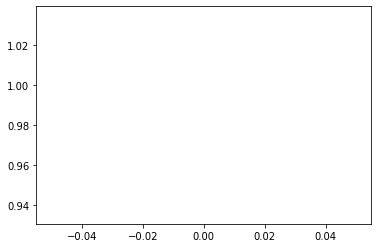

In [7]:
from sklearn.neighbors import KNeighborsClassifier

model = (KNeighborsClassifier(),"KNeighborsClassifier")

param_grid = [{"n_neighbors":[5],"weights":["uniform"]}]

clf = GridSearchCV(model[0], param_grid=param_grid, cv=3)

clf.fit(X_train, y_train_6)

print(clf.best_params_)

plt.plot(clf.cv_results_["mean_test_score"])

In [8]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

f1_scr_train = f1_score(y_train_6, y_pred_train)
f1_scr_test = f1_score(y_test_6, y_pred_test)

print("Train: ", f1_scr_train)
print("Test: ", f1_scr_test)

precision_train = precision_score(y_train_6, y_pred_train)
precision_test = precision_score(y_test_6, y_pred_test)
recall_train = recall_score(y_train_6, y_pred_train)
recall_test = recall_score(y_test_6, y_pred_test)

print("\n## Precision ##")
print("Train: ", precision_train)
print("Test: ", precision_test)
print("\n## Recall ##")
print("Train: ", recall_train)
print("Test: ", recall_test)

Train:  0.9523809523809523
Test:  0.9182920400632577

## Precision ##
Train:  0.9473684210526315
Test:  0.9275825346112886

## Recall ##
Train:  0.9574468085106383
Test:  0.9091858037578288


Dump model

In [ ]:
joblib.dump(clf.best_estimator_, model[1]+".pkl")
joblib.dump(scaler,"scaler.pkl")